In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier

In [ ]:
import torchvision

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from sklearn.datasets import make_regression, make_classification
import torch as th
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# import category_encoders as ce
import numpy as np
from sklearn.compose import ColumnTransformer
from torchmetrics import Accuracy
import torchvision.transforms.v2 as T
import torchvision.models as models
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time
import sympy


In [ ]:
data = pd.read_excel('/content/Ранжирование мероприятияй_28.06_1.xlsx')

### Проверка по контрольным точкам:

In [ ]:
data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'].value_counts()

,count
"Отобрано ФАВР (1 - соответтсвует маленькому файлу, 0- не соответствует)",
0,2113
1,163


In [ ]:
data.head()

,Мероприятие,Речной бассейн,Субъект РФ,Направление,"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)",начало,окончание,"Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)",Отобрано ИИ,"Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)",...,2029 г. (Протяженность),2030 г. (Протяженность),"Площадь восстановленных водных объектов, га","Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)",2025 г. (население),2026 г. (население),2027 г. (население),2028 г. (население),2029 г. (население),2030 г. (население)
0,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,"Разработка проектной документации ""Расчистка о...",2025,2025,0,NaN,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,Расчистка озера Ковалевское в г. Бийск Алтайск...,2026,2026,0,NaN,0,...,0.0,0.0,1.1,189600.0,0,189600,0,0,0,0
2,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,"Разработка проектной документации ""Расчистка р...",2027,2027,0,NaN,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,Расчистка русла реки Чумыш у сел Новотроицк и ...,2028,2028,0,NaN,0,...,0.0,0.0,0.0,53.0,0,0,0,53,0,0
4,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,"Разработка проектной документации ""Расчистка р...",2027,2028,0,NaN,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [ ]:
data['Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)'].value_counts()

,count
"Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)",
0,2160
1,116


>>> изменить на 0 и 1/ или 1 и 2

### удаляю столбцы, которые необходимы ане для ДБ:

In [ ]:
data = data.drop(columns = ['Направление', 'начало', 'окончание', 'Отобрано ИИ', '2025 г. (финансирование)', '2026 г. (финансирование)', '2027 г. (финансирование)', '2028 г. (финансирование)','2029 г. (финансирование)','2030 г. (финансирование)', '2025 г. (население)', '2026 г. (население)', '2027 г. (население)', '2028 г. (население)','2029 г. (население)','2030 г. (население)', '2025 г. (Протяженность)', '2026 г. (Протяженность)', '2027 г. (Протяженность)', '2028 г. (Протяженность)','2029 г. (Протяженность)','2030 г. (Протяженность)'])

In [ ]:
pd.DataFrame(data.isna().sum())

,0
Мероприятие,0
Речной бассейн,0
Субъект РФ,0
"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)",0
"Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)",0
"Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)",0
"Волга\n(2 - если речной бас = ""08.01"", ""11.01"", 1 - нет равен)",0
"Дон\n(2 - если речной бас = ""05.01"", 1 - нет равен)",0
Наличие рекомендаций Бассейнового совета,0
"Мероприятие, синхронизировано с мероприятиями по благоустройству территорий, финансируемых из бюджетов субъектов Российской Федерации и иных бюджетов (для всех направлений) \n(2 балла)",0


In [ ]:
data.dtypes

,0
Мероприятие,object
Речной бассейн,object
Субъект РФ,object
"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)",object
"Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)",int64
"Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)",int64
"Волга\n(2 - если речной бас = ""08.01"", ""11.01"", 1 - нет равен)",int64
"Дон\n(2 - если речной бас = ""05.01"", 1 - нет равен)",int64
Наличие рекомендаций Бассейнового совета,object
"Мероприятие, синхронизировано с мероприятиями по благоустройству территорий, финансируемых из бюджетов субъектов Российской Федерации и иных бюджетов (для всех направлений) \n(2 балла)",int64


In [ ]:
# data.to_excel('/Users/paulinasoloiphonex/Downloads/Ранжирование мероприятияй_28_06.xlsx', index=False)

### все строковые значения перевожу к числовому формату:

In [ ]:
data['Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)']

,"Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)"
0,0.0
1,189600.0
2,0.0
3,53.0
4,0.0
...,...
2271,409.0
2272,2489.0
2273,7078.0
2274,1630.0


In [ ]:
# data['Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)'].applymap(lambda x: str(x.replace(',','.')))

In [ ]:
data['Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)'] = data['Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)'].astype(np.float32)


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data['Мероприятие'] = label_encoder.fit_transform(data['Мероприятие'])

In [ ]:
data['Речной бассейн'] = label_encoder.fit_transform(data['Речной бассейн'])

In [ ]:
data['Субъект РФ'] = label_encoder.fit_transform(data['Субъект РФ'])

In [ ]:
data['Наличие рекомендаций Бассейнового совета'] = label_encoder.fit_transform(data['Наличие рекомендаций Бассейнового совета'])

In [ ]:
data['Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)'] = label_encoder.fit_transform(data['Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)'])

In [ ]:
data['Эффект от реализации (обоснование)'] = label_encoder.fit_transform(data['Эффект от реализации (обоснование)'])

In [ ]:
data.dtypes

,0
Мероприятие,int64
Речной бассейн,int64
Субъект РФ,int64
"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)",int64
"Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)",int64
"Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)",int64
"Волга\n(2 - если речной бас = ""08.01"", ""11.01"", 1 - нет равен)",int64
"Дон\n(2 - если речной бас = ""05.01"", 1 - нет равен)",int64
Наличие рекомендаций Бассейнового совета,int64
"Мероприятие, синхронизировано с мероприятиями по благоустройству территорий, финансируемых из бюджетов субъектов Российской Федерации и иных бюджетов (для всех направлений) \n(2 балла)",int64


### смотрю корреляцию:

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Мероприятие,Речной бассейн,Субъект РФ,"Наименование мероприятия (добавить мероприятия, из маленького, которых здесь нет)","Отобрано ФАВР (1 - соответтсвует маленькому файлу, 0- не соответствует)","Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)","Волга (2 - если речной бас = ""08.01"", ""11.01"", 1 - нет равен)","Дон (2 - если речной бас = ""05.01"", 1 - нет равен)",Наличие рекомендаций Бассейнового совета,"Мероприятие, синхронизировано с мероприятиями по благоустройству территорий, финансируемых из бюджетов субъектов Российской Федерации и иных бюджетов (для всех направлений) (2 балла)","водный объект находится в границах объекта (территории), включенного в реестр объектов культурного наследия (памятников истории и культуры) народов Российской Федерации, или является непосредственным объектом международного соглашения (меморандумов, договоров и пр.) или ООПТ (1 балл)",водный объект используется в целях обеспечения питьевого и хозяйственно-бытового водоснабжения населения (1 балл),водный объект находится в границах поселений и активно используется населением в рекреационных целях (1 балл),Эффект от реализации (обоснование),"Уровень софинансирования (чем больше, тем лучше)",ПСД,"Протяженность расчищенных участков русел рек, км (чем больше, тем лучше)","Площадь восстановленных водных объектов, га","Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел. (чем больше, тем лучше)"
Мероприятие,1.000000,0.685179,0.108731,-0.036462,0.040316,0.007733,0.373030,-0.046938,0.095030,-0.064807,-0.525346,0.250906,-0.410783,0.219653,-0.349924,0.013057,-0.088388,-0.005102,-0.150484
Речной бассейн,0.685179,1.000000,0.278269,0.012715,0.142526,0.062328,0.415871,-0.104835,0.035485,0.098859,-0.615447,0.200833,-0.269413,0.239966,-0.413319,-0.017191,-0.119752,-0.008862,-0.152566
Субъект РФ,0.108731,0.278269,1.000000,0.048002,0.069019,0.045798,0.028724,0.005163,-0.043773,0.043318,-0.262243,-0.141504,0.123484,0.112172,-0.228048,-0.027017,-0.165800,-0.022477,-0.078830
"Наименование мероприятия (добавить мероприятия, из маленького, которых здесь нет)",-0.036462,0.012715,0.048002,1.000000,0.212332,0.070668,-0.028800,0.063899,-0.011272,0.063641,0.034047,-0.106175,0.122928,0.119187,-0.374563,-0.696964,0.360017,0.008171,0.200372
"Отобрано ФАВР (1 - соответтсвует маленькому файлу, 0- не соответствует)",0.040316,0.142526,0.069019,0.212332,1.000000,0.563199,-0.041562,0.004158,-0.014629,0.187255,-0.048908,-0.016322,0.045101,0.030002,-0.095206,-0.096896,0.090254,-0.007035,0.050518
"Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)",0.007733,0.062328,0.045798,0.070668,0.563199,1.000000,-0.021425,-0.032577,-0.032082,0.112857,-0.008075,0.029475,0.015934,-0.037661,-0.052320,-0.066580,0.025757,-0.005925,0.032292
"Волга (2 - если речной бас = ""08.01"", ""11.01"", 1 - нет равен)",0.373030,0.415871,0.028724,-0.028800,-0.041562,-0.021425,1.000000,-0.204645,0.098439,-0.125086,-0.259014,0.261494,-0.319352,0.134023,-0.181656,-0.048079,-0.079695,-0.013823,-0.084315
"Дон (2 - если речной бас = ""05.01"", 1 - нет равен)",-0.046938,-0.104835,0.005163,0.063899,0.004158,-0.032577,-0.204645,1.000000,-0.260305,0.026971,-0.163339,-0.160616,0.141298,-0.171203,-0.057223,0.001038,0.092554,-0.009401,-0.065940
Наличие рекомендаций Бассейнового совета,0.095030,0.035485,-0.043773,-0.011272,-0.014629,-0.032082,0.098439,-0.260305,1.000000,-0.174848,0.127289,0.054432,-0.180470,0.172514,0.125535,0.017970,0.013598,0.022170,0.041666
"Мероприятие, синхронизировано с мероприятиями по благоустройству территорий, финансируемых из бюджетов субъектов Российской Федерации и иных бюджетов (для всех направлений) (2 балла)",-0.064807,0.098859,0.043318,0.063641,0.187255,0.112857,-0.125086,0.026971,-0.174848,1.000000,-0.042764,-0.053932,0.118071,-0.088465,-0.074250,-0.005308,-0.012570,-0.007660,0.019151


In [ ]:
data.head(2)

,Мероприятие,Речной бассейн,Субъект РФ,"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)","Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)","Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)","Волга\n(2 - если речной бас = ""08.01"", ""11.01"", 1 - нет равен)","Дон\n(2 - если речной бас = ""05.01"", 1 - нет равен)",Наличие рекомендаций Бассейнового совета,"Мероприятие, синхронизировано с мероприятиями по благоустройству территорий, финансируемых из бюджетов субъектов Российской Федерации и иных бюджетов (для всех направлений) \n(2 балла)","водный объект находится в границах объекта (территории), включенного в реестр объектов культурного наследия (памятников истории и культуры) народов Российской Федерации, или является непосредственным объектом международного соглашения (меморандумов, договоров и пр.) или ООПТ \n(1 балл)",водный объект используется в целях обеспечения питьевого и хозяйственно-бытового водоснабжения населения \n(1 балл),водный объект находится в границах поселений и активно используется населением в рекреационных целях \n(1 балл),Эффект от реализации (обоснование),"Уровень софинансирования\n(чем больше, тем лучше)",ПСД,"Протяженность расчищенных участков русел рек, км \n(чем больше, тем лучше)","Площадь восстановленных водных объектов, га","Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)"
0,6,26,0,595,0,0,1,1,19,2,0,0,1,217,0.0,1,0.0,0.0,0.0
1,6,26,0,1341,0,0,1,1,19,2,0,0,1,217,0.0,0,0.0,1.1,189600.0


### Написание кода нейронной сети:

In [ ]:
X = data.drop(columns = ['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'])
y= data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)']

In [ ]:
X.shape, y.shape

((2276, 18), (2276,))

In [ ]:
y.value_counts()

0    2113
1     163
Name: Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует), dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
Y_test.value_counts()

0    423
1     33
Name: Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует), dtype: int64

In [ ]:
Y_test_tensor = th.tensor(Y_test.values, dtype=th.float64).reshape(-1, 1)
X_train_tensor = th.tensor(X_train.values, dtype=th.float64)
X_test_tensor = th.tensor(X_test.values, dtype=th.float64)
Y_train_tensor = th.tensor(Y_train.values, dtype=th.float64).reshape(-1, 1)

In [ ]:
dataset = TensorDataset(X_train_tensor, Y_train_tensor)
data22 = DataLoader(dataset, batch_size = 10)

Epoch [0/750], Loss: 1528.2229, Accuracy: 0.5047
Epoch [5/750], Loss: 904.1705, Accuracy: 0.5293
Epoch [10/750], Loss: 575.9667, Accuracy: 0.5577
Epoch [15/750], Loss: 427.1968, Accuracy: 0.5636
Epoch [20/750], Loss: 352.7146, Accuracy: 0.5482
Epoch [25/750], Loss: 215.1397, Accuracy: 0.5479
Epoch [30/750], Loss: 147.7749, Accuracy: 0.5601
Epoch [35/750], Loss: 117.2061, Accuracy: 0.5757
Epoch [40/750], Loss: 77.4840, Accuracy: 0.5885
Epoch [45/750], Loss: 41.0066, Accuracy: 0.5861
Epoch [50/750], Loss: 33.4837, Accuracy: 0.6030
Epoch [55/750], Loss: 16.8483, Accuracy: 0.5772
Epoch [60/750], Loss: 10.5285, Accuracy: 0.5716
Epoch [65/750], Loss: 8.9450, Accuracy: 0.5716
Epoch [70/750], Loss: 6.1555, Accuracy: 0.5775
Epoch [75/750], Loss: 4.4159, Accuracy: 0.5775
Epoch [80/750], Loss: 3.3577, Accuracy: 0.5831
Epoch [85/750], Loss: 3.4663, Accuracy: 0.5710
Epoch [90/750], Loss: 3.1279, Accuracy: 0.5722
Epoch [95/750], Loss: 2.3418, Accuracy: 0.5861
Epoch [100/750], Loss: 3.2949, Accuracy:

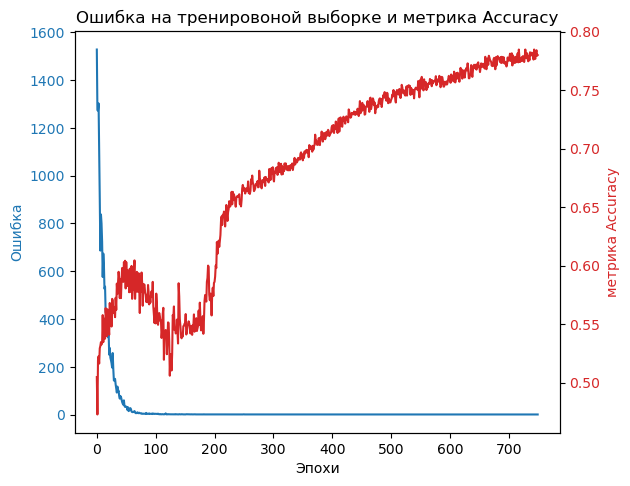

Предсказанные значения: [1 1 0 ... 1 0 1]


In [ ]:
import torch as th
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

X_train_resampled, Y_train_resampled = SMOTE().fit_resample(X_train_tensor, Y_train_tensor)

# X_train_resampled, Y_train_resampled = X_train_tensor, Y_train_tensor

X_train_tensor1 = th.tensor(X_train_resampled, dtype=th.float32)
Y_train_tensor1 = th.tensor(Y_train_resampled, dtype=th.long)

dataset = TensorDataset(X_train_tensor1, Y_train_tensor1)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size).double()  # Convert weight tensor to Double
        self.fc2 = nn.Linear(hidden_size, hidden_size).double()
        self.fc3 = nn.Linear(hidden_size, num_classes).double()
        self.dropout = nn.Dropout(0.5)

    def forward(self, X):
        out = self.fc1(X.double())  # Convert input tensor to Double
        out = F.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out


input_size = X_train.shape[1]
hidden_size = 32
num_classes = 2

model = Net(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
gamma = 0.0001
# Оптимизатор Adam
optimizer = optim.Adam(model.parameters(), lr=gamma)

num_epochs = 750
log_interval = 5

train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    epoch_losses = []
    all_preds = []
    all_labels = []

    for x, y in data_loader:
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_losses.append(loss.item())

        _, predicted = th.max(out.data, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(y.numpy())

    train_loss = sum(epoch_losses) / len(epoch_losses)
    train_accuracy = accuracy_score(all_labels, all_preds)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    if epoch % log_interval == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Эпохи')
ax1.set_ylabel('Ошибка', color=color)
ax1.plot(range(num_epochs), train_losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('метрика Accuracy', color=color)
ax2.plot(range(num_epochs), train_accuracies, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Ошибка на тренировоной выборке и метрика Accuracy')
plt.show()

model.eval()
with th.no_grad():
    outputs = model(X_train_tensor)
    _, predicted = th.max(outputs.data, 1)
    predictions = predicted.numpy()

print("Предсказанные значения:", predictions)

### Проверяю  на всем датасете:

In [ ]:
X = data.drop(columns = ['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'])
y= data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)']

In [ ]:
Y_all_train = th.tensor(y.values, dtype=th.float64).reshape(-1, 1)
X_all_train = th.tensor(X.values, dtype=th.float64)

In [ ]:
Y_all_train.shape

torch.Size([2276, 1])

In [ ]:
dataset2 = TensorDataset(X_all_train, Y_all_train)
data222 = DataLoader(dataset2, batch_size=1)
predicrion_all_data =[]
true_labels = []
# Предсказание значений на датасете и вывод результатов
for inputs, labels in data222:
    outputs = model(inputs)
    _, predicted = th.max(outputs, 1)
    predicrion_all_data.append(predicted.item())
    true_labels.append(labels.item())
    print('Predicted:', predicted.item(), 'Actual:', labels.item())

Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 1.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 1.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 1.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 0 Actual: 0.0
Predicted: 1 Actual: 0.0
Predicted: 0 Actual: 0.0


In [ ]:
predicrion_all_data1 = pd.DataFrame({'ИИ' :predicrion_all_data})

In [ ]:
np.unique(predicrion_all_data, return_counts=True)

(array([0, 1]), array([1281,  995]))

In [ ]:
np.unique(true_labels, return_counts=True)

(array([0., 1.]), array([2113,  163]))

In [ ]:
len(true_labels)

2276

In [ ]:
# accuracy_score(true_labels, predicrion_all_data)

In [ ]:
accuracy = accuracy_score(true_labels, predicrion_all_data)
round(accuracy, 2)

0.64

### Машинное обучение

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
grid = param_grid={
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [1, 2, 3, None]
}

In [ ]:
grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid=grid,
    scoring="accuracy"
).fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [ ]:
grid.best_params_, grid.best_score_

AttributeError: 'dict' object has no attribute 'best_params_'

>>> RandomForestClassifier

In [ ]:
model = RandomForestClassifier(max_depth=None, n_estimators=100).fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9671052631578947

In [ ]:
y_pred = model.predict(X_test)

* Accuracy для RandomForestClassifier

In [ ]:
Accuracy_t = accuracy_score(Y_test, y_pred)
Accuracy_t

0.9671052631578947

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[419,   4],
       [ 11,  22]])

In [ ]:
pred = pd.DataFrame({'изначально':Y_test, 'предсказанные':y_pred})

In [ ]:
pred['изначально'].value_counts()

0    423
1     33
Name: изначально, dtype: int64

In [ ]:
pred['предсказанные'].value_counts()

0    430
1     26
Name: предсказанные, dtype: int64

* recall для RandomForestClassifier

In [ ]:
recall_score_t = recall_score(Y_test, y_pred); recall_score_t

0.6666666666666666

* precision для RandomForestClassifier

In [ ]:
precision_score_t = precision_score(Y_test, y_pred); precision_score_t

0.8461538461538461

* f1_score для RandomForestClassifier

In [ ]:
f1_score_t = f1_score(Y_test, y_pred); f1_score_t

0.7457627118644068

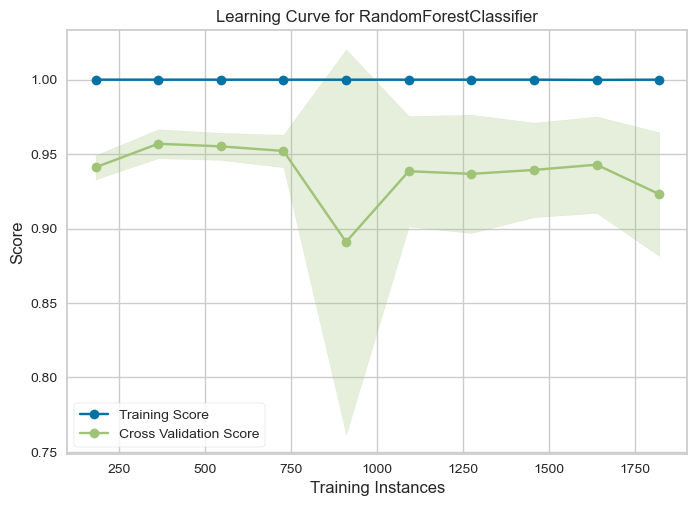

In [ ]:
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

>>> LogisticRegression

In [ ]:
grid = param_grid={
    "penalty": ["l1", "l2", "elasticnet",None],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [ ]:
grid = GridSearchCV(
    LogisticRegression(),
    param_grid=grid,
    scoring="accuracy"
).fit(X_train, Y_train)

/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
grid.best_params_, grid.best_score_

({'penalty': 'l2', 'solver': 'newton-cholesky'}, 0.9521978021978021)

In [ ]:
clf1 = LogisticRegression(penalty = 'l2', solver = 'newton-cholesky')
clf1.fit(X_train, Y_train)
y_pred = clf1.predict(X_test)
Accuracy_t1 = accuracy_score(Y_test, y_pred)
Accuracy_t1

/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #11. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(


0.9517543859649122

* recall для LogisticRegression

In [ ]:
recall_score_t1 = recall_score(Y_test, y_pred); recall_score_t1

0.45454545454545453

* precision для LogisticRegression

In [ ]:
precision_score_t1 = precision_score(Y_test, y_pred); precision_score_t1

0.7894736842105263

* f1_score для LogisticRegression

In [ ]:
f1_score_t1 = f1_score(Y_test, y_pred); f1_score_t1

0.5769230769230769

>>> PassiveAggressiveClassifier

In [ ]:
grid = param_grid={
    "C": [0, 0.5, 1, 1.5, 2],
    "loss": ["hinge", "squared_hinge"]
}

In [ ]:
grid = GridSearchCV(
    PassiveAggressiveClassifier(),
    param_grid=grid,
    scoring="accuracy"
).fit(X_train, Y_train)

/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_passive_aggressive.py", line 301, in fit
    self._validate_params()
  File "/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, i

In [ ]:
grid.best_params_, grid.best_score_

({'C': 2, 'loss': 'hinge'}, 0.9181318681318681)

* accuracy для PassiveAggressiveClassifier

In [ ]:
clf2 = PassiveAggressiveClassifier(C = 2, loss = 'hinge')
clf2.fit(X_train, Y_train)
y_pred = clf2.predict(X_test)
Accuracy_t2 = accuracy_score(Y_test, y_pred)
# Precision_t2 = precision_score(y_test, y_pred, average='macro')
# Recall_t2 = recall_score(y_test, y_pred)
# F1_t2 = f1_score(y_test, y_pred)
# AUCROC_t2 = roc_auc_score(y_test, clf.decision_function(X_test_t))
Accuracy_t2

0.9013157894736842

* recall для PassiveAggressiveClassifier

In [ ]:
recall_score_t2 = recall_score(Y_test, y_pred); recall_score_t2

0.09090909090909091

* precision для PassiveAggressiveClassifier

In [ ]:
precision_score_t2 = precision_score(Y_test, y_pred); precision_score_t2

0.16666666666666666

* f1_score для PassiveAggressiveClassifier

In [ ]:
f1_score_t2 = f1_score(Y_test, y_pred); f1_score_t2

0.11764705882352942

>>> RidgeClassifier

In [ ]:
grid = param_grid={
    "alpha": [0, 0.5, 1, 1.5, 2],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs', 'auto']
}

In [ ]:
grid = GridSearchCV(
    RidgeClassifier(),
    param_grid=grid,
    scoring="accuracy"
).fit(X_train, Y_train)

/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulinasoloiphonex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
grid.best_params_, grid.best_score_

({'alpha': 0, 'solver': 'svd'}, 0.9483516483516483)

* accuracy для RidgeClassifier

In [ ]:
clf3 = RidgeClassifier(alpha= 0, solver= 'svd')
clf3.fit(X_train, Y_train)
y_pred = clf3.predict(X_test)
Accuracy_t3 = accuracy_score(Y_test, y_pred)
# Precision_t3 = precision_score(Y_test, y_pred, average='macro')
# Recall_t3 = recall_score(y_test, y_pred)
# F1_t3 = f1_score(y_test, y_pred)
# AUCROC_t3 = roc_auc_score(y_test, clf.decision_function(X_test_t))
Accuracy_t3

0.9473684210526315

* recall для RidgeClassifier

In [ ]:
recall_score_t3 = recall_score(Y_test, y_pred); recall_score_t3

0.6060606060606061

* precision для RidgeClassifier

In [ ]:
precision_score_t3 = precision_score(Y_test, y_pred); precision_score_t3

0.6451612903225806

* f1_score для RidgeClassifier

In [ ]:
f1_score_t3 = f1_score(Y_test, y_pred); f1_score_t3

0.625

>>> сравнение метрик на тестовом множестве:

In [ ]:
data_test_scores = pd.DataFrame({'Метрика' : ['Accuracy', 'Recall_score', 'Precision_score', 'F1_score'], 'RandomForest' : [Accuracy_t, recall_score_t, precision_score_t, f1_score_t] , 'LogisticRegression' : [Accuracy_t1, recall_score_t1, precision_score_t1, f1_score_t1], 'PassiveAggressive' : [Accuracy_t2, recall_score_t2, precision_score_t2, f1_score_t2], 'RidgeClassifier' : [Accuracy_t3, recall_score_t3, precision_score_t3, f1_score_t3]})

1. Accuracy - из всех мероприятияй, какую долю модель предсказала правильно (т.е. и профинансированы и не профинансированы)

2. Recall_score - из всех мероприятий, которые выбраны человеком, у какой доли модель распознала финансирование


3. Precision_score - из всех мероприятий, где модель предсказала финансирование, какая доля действительно получила финансирование (то есть выбрана человеком)

4. F1_score - среднее геометрическое Recall_score и Precision_score

In [ ]:
data_test_scores

,Метрика,RandomForest,LogisticRegression,PassiveAggressive,RidgeClassifier
0,Accuracy,0.967105,0.951754,0.901316,0.947368
1,Recall_score,0.666667,0.454545,0.090909,0.606061
2,Precision_score,0.846154,0.789474,0.166667,0.645161
3,F1_score,0.745763,0.576923,0.117647,0.625000


### Проверка всех модели RandomForest машинного обучения на всем датасеете:

>>> RandomForestClassifier

In [ ]:
y_pred_RandomForestClassifier = model.predict(X)

In [ ]:
y= data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)']

In [ ]:
len(y), len(y_pred_RandomForestClassifier)

(2276, 2276)

In [ ]:
accuracy_score_clf = accuracy_score(y, y_pred_RandomForestClassifier)
accuracy_score_clf

0.9934094903339191

* recall для RandomForestClassifier

In [ ]:
recall_score_clf = recall_score(y, y_pred_RandomForestClassifier); recall_score_clf

0.9325153374233128

* precision для RandomForestClassifier

In [ ]:
precision_score_clf = precision_score(y, y_pred_RandomForestClassifier); precision_score_clf

0.9743589743589743

* f1_score для RandomForestClassifier

In [ ]:
f1_score_clf = f1_score(y, y_pred_RandomForestClassifier); f1_score_clf

0.9529780564263322

In [ ]:
data__RandomForestClassifier = pd.DataFrame({'Метрика' : ['Accuracy', 'Recall_score', 'Precision_score', 'F1_score'], 'RandomForest' : [accuracy_score_clf, recall_score_clf, precision_score_clf, f1_score_clf]})

1. Accuracy - из всех мероприятияй, какую долю модель предсказала правильно (т.е. и профинансированы и не профинансированы)
2. Recall_score - из всех мероприятий, которые выбраны человеком, у какой доли модель распознала финансирование
3. Precision_score - из всех мероприятий, где модель предсказала финансирование, какая доля действительно получила финансирование (то есть выбрана человеком)
4. F1_score - среднее геометрическое Recall_score и Precision_score

In [ ]:
data__RandomForestClassifier

,Метрика,RandomForest
0,Accuracy,0.993409
1,Recall_score,0.932515
2,Precision_score,0.974359
3,F1_score,0.952978


* confusion_matrix

In [ ]:
confusion_matrix(y, y_pred_RandomForestClassifier)

array([[2109,    4],
       [  11,  152]])

* кросс-валидация

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score


In [ ]:
cv_results = cross_val_score(model,
                             X,
                             y,
                             cv = 2,
                             scoring = 'accuracy',
                             n_jobs=-1)

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96045694 0.74340949]
Среднее по кросс-валидации:  0.851933216168717
Дисперсия по кросс-валидации:  0.10852372583479791


In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.model_selection import LearningCurve

In [ ]:
pred_MO = pd.DataFrame({'Значения МО': y_pred_RandomForestClassifier})

In [ ]:
pred_MO['Значения МО'].value_counts()

0    2120
1     156
Name: Значения МО, dtype: int64

In [ ]:
pred_MO.to_excel('/Users/paulinasoloiphonex/Downloads/Предсказанное_МО_28_06.xlsx', index=False)

### Сравнение строк с разными значениями:

In [ ]:
data = pd.read_excel('/Users/paulinasoloiphonex/Downloads/Ранжирование мероприятияй_28.06_1.xlsx')

In [ ]:
data.head(2)

,Мероприятие,Речной бассейн,Субъект РФ,Направление,"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)",начало,окончание,"Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)",Отобрано ИИ,"Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)",...,2029 г. (Протяженность),2030 г. (Протяженность),"Площадь восстановленных водных объектов, га","Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)",2025 г. (население),2026 г. (население),2027 г. (население),2028 г. (население),2029 г. (население),2030 г. (население)
0,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,"Разработка проектной документации ""Расчистка о...",2025,2025,0,NaN,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,Расчистка озера Ковалевское в г. Бийск Алтайск...,2026,2026,0,NaN,0,...,0.0,0.0,1.1,189600.0,0,189600,0,0,0,0


In [ ]:
data['Отобрано ИИ'] = pred_MO['Значения МО']

In [ ]:
data['Отобрано ИИ'].value_counts()

0    2120
1     156
Name: Отобрано ИИ, dtype: int64

In [ ]:
different_rows = data[data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'] != data['Отобрано ИИ']]
print("Строки, где значения в столбцах A и B разные:")
print(len(different_rows))

Строки, где значения в столбцах A и B разные:
15


In [ ]:
# different_rows

In [ ]:
data['Отобрано ИИ'].value_counts()

0    2120
1     156
Name: Отобрано ИИ, dtype: int64

In [ ]:
data.to_excel('/Users/paulinasoloiphonex/Downloads/new.xlsx', index=False)

In [ ]:
picked_one_by_favr = data[data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'] == 0]
picked_one_by_favr[picked_one_by_favr['Отобрано ИИ']==1]

,Мероприятие,Речной бассейн,Субъект РФ,Направление,"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)",начало,окончание,"Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)",Отобрано ИИ,"Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)",...,2029 г. (Протяженность),2030 г. (Протяженность),"Площадь восстановленных водных объектов, га","Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)",2025 г. (население),2026 г. (население),2027 г. (население),2028 г. (население),2029 г. (население),2030 г. (население)
1,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,Расчистка озера Ковалевское в г. Бийск Алтайск...,2026,2026,0,1,0,...,0.0,0.0,1.1,189600.0,0,189600,0,0,0,0
475,Крымский БО,21.01 - Реки полуострова Крым бассейна Черного...,г. Севастополь,1,Расчистки русла реки Балаклавка на территории ...,2025,2025,0,1,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1570,Балтийский БО,01.04 - Нева (включая бассейны рек Онежского и...,Республика Карелия,1,Расчистка русла реки Черная на территории Пуд...,2028,2029,0,1,1,...,12.0,0.0,0.0,5.0,0,0,0,0,5,0
2060,Днепровский БО,04.01 - Днепр (российская часть бассейна),Смоленская область,1,Расчистка русла реки Березина в городе Рудня С...,2027,2027,0,1,1,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [ ]:
new_data2 = data[data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'] == 1]
new_data2 = new_data2[new_data2['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'] == new_data2['Отобрано ИИ']]
new_data2

,Мероприятие,Речной бассейн,Субъект РФ,Направление,"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)",начало,окончание,"Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)",Отобрано ИИ,"Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)",...,2029 г. (Протяженность),2030 г. (Протяженность),"Площадь восстановленных водных объектов, га","Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)",2025 г. (население),2026 г. (население),2027 г. (население),2028 г. (население),2029 г. (население),2030 г. (население)
5,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,Расчистка русла реки Барнаулка в г. Барнауле А...,2029,2030,1,1,0,...,2.2,3.3,0.0,623000.0,0,0,0,0,249000,374000
7,Верхнеобский БО,13.01 - (Верхняя) Обь до впадения Иртыша,Алтайский край,1,Расчистка озера Малые Кубы в с. Родино Родинск...,2027,2028,1,1,0,...,0.0,0.0,7.3,8700.0,0,0,3450,5250,0,0
15,Двинско-Печорский БО,03.02 - Северная Двина,Архангельская область,1,Расчистка реки Северная Двина на территории го...,2030,2030,1,1,1,...,0.0,7.0,0.0,0.0,0,0,0,0,0,0
45,Нижневолжский БО,11.01 - Волга от верховий Куйбышевского водохр...,Астраханская область,1,"Расчистка пр. Каражар (пр. Колки, пр. Кошеванк...",2025,2025,1,1,1,...,0.0,0.0,0.0,998.0,998,0,0,0,0,0
46,Нижневолжский БО,11.01 - Волга от верховий Куйбышевского водохр...,Астраханская область,1,Расчистка ер. Яблонка и Воложка Сенная в с. Яб...,2025,2026,1,1,1,...,0.0,0.0,0.0,448.0,0,448,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,Кубанский БО,06.02 - Кубань,Краснодарский край,1,Расчистка русла р. Ясени в районе ст-цы Новояс...,2025,2027,1,1,0,...,0.0,0.0,0.0,409.0,0,0,409,0,0,0
2272,Кубанский БО,06.02 - Кубань,Краснодарский край,1,Расчистка р. Челбас в районе ст-цы Старолеушко...,2026,2028,1,1,0,...,0.0,0.0,0.0,2489.0,0,0,0,"2 489,0",0,0
2273,Кубанский БО,06.02 - Кубань,Краснодарский край,1,Расчистка русла р. Понура в ст-це Калининская ...,2028,2030,1,1,0,...,0.0,0.5,0.0,7078.0,0,0,0,0,0,"7 078,0"
2274,Донской БО,05.01 - Дон (российская часть бассейна),Курская область,1,Расчистка русла р.Тим в Тимском районе Курской...,2028,2030,1,1,0,...,0.0,2.0,0.0,1630.0,0,0,0,0,0,"1 630,00"


# Написание нового года с использованием catboost

In [ ]:
import pickle
from catboost import CatBoostClassifier, Pool
import optuna
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:
def check_on_all(df, model):
  X_new = df.drop(columns = ['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'])
  y_new = df['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)']

  y_new_pred = model.predict(X_new)

  print(classification_report(y_new, y_new_pred))
  df['Предсказанные значения МО'] = y_new
  df['Предсказанные значения МО'].replace({0: 'нет', 1: 'да'})
  return df

In [ ]:
def prepared_df(data: pd.DataFrame):
  data = data.drop(columns = ['Мероприятие', 'Речной бассейн', 'Направление', 'начало', 'окончание', 'Отобрано ИИ', '2025 г. (финансирование)', '2026 г. (финансирование)', '2027 г. (финансирование)', '2028 г. (финансирование)','2029 г. (финансирование)','2030 г. (финансирование)', '2025 г. (население)', '2026 г. (население)', '2027 г. (население)', '2028 г. (население)','2029 г. (население)','2030 г. (население)', '2025 г. (Протяженность)', '2026 г. (Протяженность)', '2027 г. (Протяженность)', '2028 г. (Протяженность)','2029 г. (Протяженность)','2030 г. (Протяженность)'])
  data = data.fillna(0)
  label_encoder = LabelEncoder()
  data['Субъект РФ'] = data['Субъект РФ'].str.lower()
  data['Субъект РФ'] = label_encoder.fit_transform(data['Субъект РФ'])

  label_encoder = LabelEncoder()
  data['Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)'] = data['Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)'].str.lower()
  data['Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)'] = label_encoder.fit_transform(data['Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)'])

  label_encoder = LabelEncoder()
  data['Эффект от реализации (обоснование)'] = data['Эффект от реализации (обоснование)'].str.lower()
  data['Эффект от реализации (обоснование)'] = label_encoder.fit_transform(data['Эффект от реализации (обоснование)'])

  label_encoder = LabelEncoder()
  data['Наличие рекомендаций Бассейнового совета'] = label_encoder.fit_transform(data['Наличие рекомендаций Бассейнового совета'])

  return data

In [ ]:
def balanced_XY(data): #Берет все строки с единицами в целевой переменной, добавляет столько же с нулями
  only_ones = data[data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'] == 1]
  balanced_data_hand = pd.concat([only_ones, (data[data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'] == 0].sample(frac=1)[:len(only_ones) + 1])]).sample(frac=1)

  X_bal = balanced_data_hand.drop(columns = ['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'])
  y_bal = balanced_data_hand['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)']

  X_train, X_test, Y_train, Y_test = train_test_split(
    X_bal, y_bal, random_state=2023, test_size=0.3)

  return X_train, X_test, Y_train, Y_test

In [ ]:
data = pd.read_excel('/content/Ранжирование мероприятияй_28.06_1.xlsx')

In [ ]:
df = prepared_df(data)

In [ ]:
#df.to_excel('prepared_df.xlsx')

In [ ]:
X_train, X_test, Y_train, Y_test = balanced_XY(df)

### обычная модель

In [ ]:
model = CatBoostClassifier(
    iterations=500,  # Количество деревьев
    learning_rate=0.05,  # Скорость обучения
    depth=6,  # Глубина деревьев
    loss_function='Logloss',  # Для бинарной классификации
    eval_metric='AUC',  # Оцениваем AUC
    verbose=100,  # Вывод логов каждые 100 итераций
    l2_leaf_reg=3,  # L2 регуляризация
    random_strength = 1,  # Добавляет случайность в процесс построения деревьев
    bagging_temperature=1,  # Добавляет случайность при выборке подвыборок
    # scale_pos_weight=scale_pos_weight,  # Учитываем дисбаланс
    # cat_features=cat_features,  # Категориальные признаки
)

# Обучаем модель
model.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=50)

# Делаем предсказания
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_test)

# Оцениваем качество модели
print("Train classification report:\n", classification_report(Y_train, y_train_pred))
print("Validation classification report:\n", classification_report(Y_test, y_val_pred))
print("Validation ROC AUC:", roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

0:	test: 0.8758170	best: 0.8758170 (0)	total: 2.03ms	remaining: 1.01s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9468954248
bestIteration = 44

Shrink model to first 45 iterations.
Train classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       113
           1       0.98      0.97      0.98       115

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228

Validation classification report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.86        51
           1       0.83      0.90      0.86        48

    accuracy                           0.86        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.86      0.86      0.86        99

Validation ROC AUC: 0.9468954248366013


In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
def optimize_hyperparameters(X_train, y_train, n_trials=100):
    # Use a lambda or partial to pass the additional arguments to the objective function
    def objective(trial):
      params = {
          'iterations': trial.suggest_int('iterations', 100, 1000, step=100),
          'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
          'depth': trial.suggest_int('depth', 3, 10),
          'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
          'random_strength': trial.suggest_uniform('random_strength', 0, 2),
          'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 2),
          'loss_function': 'Logloss',
          'eval_metric': 'AUC',
          'verbose': 0,
      }
      print(f"Trial {trial.number}: params = {params}")
      try:
          model = CatBoostClassifier(**params)
          model.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=50)
          y_pred = model.predict(X_test)
          roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
          return roc_auc
      except Exception as e:
          print(f"Trial {trial.number} failed with exception: {e}")
          return None

    study = optuna.create_study(direction='maximize')  # direction='maximize' потому что мы максимизируем AUC
    study.optimize(objective, n_trials=100)

    print("Number of finished trials:", len(study.trials))
    print("Best trial:", study.best_trial.number)
    print("Best AUC:", study.best_value)
    print("Best hyperparameters:", study.best_params)

    best_params = study.best_params
    best_params['loss_function'] = 'Logloss' # Добавляем функцию потерь, потому что Optuna не может ее оптимизировать
    best_params['eval_metric'] = 'AUC'       # и метрику для оценки
    best_params['verbose'] = 100
    return best_params

In [ ]:
best_params = optimize_hyperparameters(X_train, Y_train)

<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 0: params = {'iterations': 900, 'learning_rate': 0.0022616068139999657, 'depth': 3, 'l2_leaf_reg': 1.1925182458372199, 'random_strength': 1.6443538771480257, 'bagging_temperature': 0.9725919274376864, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 1: params = {'iterations': 900, 'learning_rate': 0.0704594823510651, 'depth': 7, 'l2_leaf_reg': 0.028540013352727586, 'random_strength': 0.9979408040346904, 'bagging_temperature': 1.89685636323449, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 2: params = {'iterations': 1000, 'learning_rate': 0.004308532467677862, 'depth': 5, 'l2_leaf_reg': 0.00586807273871993, 'random_strength': 1.9482353818579559, 'bagging_temperature': 1.3519109626733548, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 3: params = {'iterations': 700, 'learning_rate': 0.025016757442317523, 'depth': 3, 'l2_leaf_reg': 0.0967764168224906, 'random_strength': 0.8828441027105911, 'bagging_temperature': 0.8750761895349894, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 4: params = {'iterations': 800, 'learning_rate': 0.00028495892654537973, 'depth': 10, 'l2_leaf_reg': 0.06632916281600051, 'random_strength': 1.8474111201043306, 'bagging_temperature': 0.3796227533205352, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 5: params = {'iterations': 300, 'learning_rate': 0.0002874204337876104, 'depth': 6, 'l2_leaf_reg': 0.00024128835443593032, 'random_strength': 0.003956872146278156, 'bagging_temperature': 1.771079852395559, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 6: params = {'iterations': 900, 'learning_rate': 0.01576117281053279, 'depth': 3, 'l2_leaf_reg': 0.01763706926781061, 'random_strength': 1.3358867268436148, 'bagging_temperature': 1.8788208844985708, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 7: params = {'iterations': 800, 'learning_rate': 0.03258590385215096, 'depth': 4, 'l2_leaf_reg': 8.313743851445809, 'random_strength': 0.3753325094681905, 'bagging_temperature': 1.714975247936763, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 8: params = {'iterations': 200, 'learning_rate': 0.00023390431084596372, 'depth': 5, 'l2_leaf_reg': 0.05635908880537172, 'random_strength': 1.411534092733449, 'bagging_temperature': 1.9406080921197846, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 9: params = {'iterations': 200, 'learning_rate': 0.00474096402668467, 'depth': 8, 'l2_leaf_reg': 0.835995467035512, 'random_strength': 5.72286157773938e-05, 'bagging_temperature': 1.7889607976871382, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 10: params = {'iterations': 400, 'learning_rate': 0.00010225494502454774, 'depth': 9, 'l2_leaf_reg': 0.00012445946056762288, 'random_strength': 0.5194617545764639, 'bagging_temperature': 0.056575302299485264, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 11: params = {'iterations': 400, 'learning_rate': 0.00010654140594031925, 'depth': 9, 'l2_leaf_reg': 0.00012222069795798913, 'random_strength': 0.4399090304227966, 'bagging_temperature': 0.03658964064192401, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 12: params = {'iterations': 400, 'learning_rate': 0.0008225877171805595, 'depth': 7, 'l2_leaf_reg': 0.00015202794580859187, 'random_strength': 0.013406029382393443, 'bagging_temperature': 0.5914430648583469, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 13: params = {'iterations': 400, 'learning_rate': 0.0001157751565436517, 'depth': 6, 'l2_leaf_reg': 0.0009717508912098498, 'random_strength': 0.533953278905636, 'bagging_temperature': 1.3372083338859944, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 14: params = {'iterations': 600, 'learning_rate': 0.0006225719027348099, 'depth': 10, 'l2_leaf_reg': 0.0010057680843986426, 'random_strength': 0.6864923311406869, 'bagging_temperature': 0.046932295234416666, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 15: params = {'iterations': 600, 'learning_rate': 0.0008612993922996747, 'depth': 6, 'l2_leaf_reg': 0.0014992629533632012, 'random_strength': 0.7612836749942629, 'bagging_temperature': 1.4074511745571936, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 16: params = {'iterations': 100, 'learning_rate': 0.0007974688613016885, 'depth': 10, 'l2_leaf_reg': 0.0006803819289201474, 'random_strength': 0.2818890186625932, 'bagging_temperature': 0.6438337324199541, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 17: params = {'iterations': 600, 'learning_rate': 0.00038677092222673306, 'depth': 8, 'l2_leaf_reg': 0.0022096933130503673, 'random_strength': 1.2548380500267848, 'bagging_temperature': 1.5844427529295257, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 18: params = {'iterations': 500, 'learning_rate': 0.0014109552742549592, 'depth': 5, 'l2_leaf_reg': 0.0004279802710069479, 'random_strength': 0.7457374625624793, 'bagging_temperature': 1.1101068068703932, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 19: params = {'iterations': 300, 'learning_rate': 0.00045658207039341937, 'depth': 8, 'l2_leaf_reg': 0.005343057722270186, 'random_strength': 0.19413415288890754, 'bagging_temperature': 0.3676430826545218, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 20: params = {'iterations': 500, 'learning_rate': 0.009704124094775172, 'depth': 9, 'l2_leaf_reg': 0.006574733458240442, 'random_strength': 1.1139582085803215, 'bagging_temperature': 1.1756770680196351, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 21: params = {'iterations': 500, 'learning_rate': 0.007031418596066286, 'depth': 9, 'l2_leaf_reg': 0.0037396913098598204, 'random_strength': 1.1036813331194077, 'bagging_temperature': 1.2169277046728606, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 22: params = {'iterations': 700, 'learning_rate': 0.0071788116929694746, 'depth': 10, 'l2_leaf_reg': 0.00038180129399108064, 'random_strength': 0.6771621903997087, 'bagging_temperature': 1.573245298294876, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 23: params = {'iterations': 700, 'learning_rate': 0.006462150574499114, 'depth': 10, 'l2_leaf_reg': 0.003399329050588654, 'random_strength': 0.6879335672156864, 'bagging_temperature': 1.6034736055430112, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 24: params = {'iterations': 600, 'learning_rate': 0.0023110989721648397, 'depth': 10, 'l2_leaf_reg': 0.0005372837774819, 'random_strength': 1.060127201630623, 'bagging_temperature': 0.7924264058995257, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 25: params = {'iterations': 700, 'learning_rate': 0.008074611308457904, 'depth': 9, 'l2_leaf_reg': 0.013754419546543389, 'random_strength': 0.9116698344671001, 'bagging_temperature': 1.199024076613202, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 26: params = {'iterations': 700, 'learning_rate': 0.016837849424445692, 'depth': 10, 'l2_leaf_reg': 0.0016082135163060234, 'random_strength': 0.6122754737835954, 'bagging_temperature': 1.4938830550527105, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 27: params = {'iterations': 800, 'learning_rate': 0.09239697030470075, 'depth': 10, 'l2_leaf_reg': 0.0003226853398737063, 'random_strength': 0.6240597141704385, 'bagging_temperature': 1.5022977379041296, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 28: params = {'iterations': 700, 'learning_rate': 0.013951065266040112, 'depth': 8, 'l2_leaf_reg': 0.0014321614984263333, 'random_strength': 0.8494824166140997, 'bagging_temperature': 0.23233449905742184, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 29: params = {'iterations': 1000, 'learning_rate': 0.0028333872268242162, 'depth': 10, 'l2_leaf_reg': 0.3723305452912494, 'random_strength': 1.5256451822916928, 'bagging_temperature': 1.0539938325355418, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 30: params = {'iterations': 800, 'learning_rate': 0.033593338651941425, 'depth': 9, 'l2_leaf_reg': 0.0010881331095580465, 'random_strength': 0.21197852344292845, 'bagging_temperature': 0.9378787716576199, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 31: params = {'iterations': 500, 'learning_rate': 0.012632840962466915, 'depth': 9, 'l2_leaf_reg': 0.0031587215252840105, 'random_strength': 0.5934856671340186, 'bagging_temperature': 1.2520467042072647, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 32: params = {'iterations': 600, 'learning_rate': 0.02195190723544333, 'depth': 10, 'l2_leaf_reg': 0.009286725572447935, 'random_strength': 1.1924332603720713, 'bagging_temperature': 1.4599733742220347, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 33: params = {'iterations': 700, 'learning_rate': 0.05228788879562709, 'depth': 9, 'l2_leaf_reg': 0.0029211688454850505, 'random_strength': 0.968966935554414, 'bagging_temperature': 1.626544514467953, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 34: params = {'iterations': 500, 'learning_rate': 0.004609263508954574, 'depth': 10, 'l2_leaf_reg': 0.000706857456551806, 'random_strength': 0.8056456079199538, 'bagging_temperature': 1.2999583058022175, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 35: params = {'iterations': 600, 'learning_rate': 0.0017102770348760192, 'depth': 8, 'l2_leaf_reg': 0.030052677627085172, 'random_strength': 1.0384381898059294, 'bagging_temperature': 1.4993355797431769, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 36: params = {'iterations': 900, 'learning_rate': 0.0037382365103872527, 'depth': 10, 'l2_leaf_reg': 0.0002486277467447792, 'random_strength': 1.755678086501756, 'bagging_temperature': 0.787644131081318, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 37: params = {'iterations': 700, 'learning_rate': 0.0062734450928008025, 'depth': 9, 'l2_leaf_reg': 0.16986238508858237, 'random_strength': 0.40160711230902146, 'bagging_temperature': 1.0050721807178564, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 38: params = {'iterations': 800, 'learning_rate': 0.018789290710014166, 'depth': 7, 'l2_leaf_reg': 0.016764021205052125, 'random_strength': 0.6530746082759827, 'bagging_temperature': 1.726695308841609, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 39: params = {'iterations': 500, 'learning_rate': 0.009541275891728146, 'depth': 10, 'l2_leaf_reg': 0.0019771362017301087, 'random_strength': 0.915498039383164, 'bagging_temperature': 1.3874252988041977, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 40: params = {'iterations': 600, 'learning_rate': 0.04931515112525727, 'depth': 9, 'l2_leaf_reg': 6.968835007908069, 'random_strength': 0.47558754687538374, 'bagging_temperature': 1.1114000703610876, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 41: params = {'iterations': 500, 'learning_rate': 0.010397643810799802, 'depth': 10, 'l2_leaf_reg': 0.0017107104960567762, 'random_strength': 0.8677530768119699, 'bagging_temperature': 1.3777613755801768, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 42: params = {'iterations': 900, 'learning_rate': 0.027823081606114512, 'depth': 10, 'l2_leaf_reg': 0.005257452848702355, 'random_strength': 0.7478811447731051, 'bagging_temperature': 1.5423902456677432, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 43: params = {'iterations': 300, 'learning_rate': 0.005991855996457051, 'depth': 10, 'l2_leaf_reg': 0.0008860691718093921, 'random_strength': 1.1836389001015164, 'bagging_temperature': 1.649458968967126, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 44: params = {'iterations': 700, 'learning_rate': 0.012325617817554844, 'depth': 9, 'l2_leaf_reg': 0.00022206020487587974, 'random_strength': 0.9760590709456606, 'bagging_temperature': 1.8736406342134124, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 45: params = {'iterations': 400, 'learning_rate': 0.003192807778655789, 'depth': 10, 'l2_leaf_reg': 0.00045231681184313354, 'random_strength': 1.383181157915016, 'bagging_temperature': 1.281083430672143, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 46: params = {'iterations': 500, 'learning_rate': 0.008210376990480552, 'depth': 9, 'l2_leaf_reg': 0.0013555671495078003, 'random_strength': 0.5717096259049911, 'bagging_temperature': 1.397425968557491, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 47: params = {'iterations': 600, 'learning_rate': 0.01907927400846788, 'depth': 10, 'l2_leaf_reg': 0.04827720773363853, 'random_strength': 0.8381646903563924, 'bagging_temperature': 0.557399520180183, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 48: params = {'iterations': 800, 'learning_rate': 0.03860424135253081, 'depth': 4, 'l2_leaf_reg': 0.00010335072473405314, 'random_strength': 0.7202064494687807, 'bagging_temperature': 1.8153032112386858, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 49: params = {'iterations': 800, 'learning_rate': 0.0428487843588776, 'depth': 3, 'l2_leaf_reg': 0.00014706417776354894, 'random_strength': 0.3571378599794513, 'bagging_temperature': 1.9974431918546776, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 50: params = {'iterations': 1000, 'learning_rate': 0.06922086687806259, 'depth': 4, 'l2_leaf_reg': 0.00010009497363726412, 'random_strength': 0.6916283560661022, 'bagging_temperature': 1.8597214843652279, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 51: params = {'iterations': 900, 'learning_rate': 0.016089539597980252, 'depth': 5, 'l2_leaf_reg': 0.00026865943102141987, 'random_strength': 0.5052436678521249, 'bagging_temperature': 1.7932219026469662, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 52: params = {'iterations': 900, 'learning_rate': 0.03411946122107611, 'depth': 4, 'l2_leaf_reg': 0.00021534691422666995, 'random_strength': 0.5050126078989836, 'bagging_temperature': 1.794788571419015, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 53: params = {'iterations': 900, 'learning_rate': 0.03636567728820709, 'depth': 4, 'l2_leaf_reg': 0.0002648524724411135, 'random_strength': 0.4979680351486604, 'bagging_temperature': 1.8131471676273345, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 54: params = {'iterations': 900, 'learning_rate': 0.0283550048997892, 'depth': 4, 'l2_leaf_reg': 0.00029206539028633796, 'random_strength': 0.4427870610921596, 'bagging_temperature': 1.721529176148644, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 55: params = {'iterations': 1000, 'learning_rate': 0.00019055183129910696, 'depth': 5, 'l2_leaf_reg': 0.00016721380630616063, 'random_strength': 0.27313143105166604, 'bagging_temperature': 1.9356600886698772, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 56: params = {'iterations': 800, 'learning_rate': 0.06390233410531555, 'depth': 3, 'l2_leaf_reg': 0.00039185628499113003, 'random_strength': 0.33972896181216006, 'bagging_temperature': 1.660483392003769, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 57: params = {'iterations': 900, 'learning_rate': 0.010998864033141225, 'depth': 5, 'l2_leaf_reg': 0.0007195241078212098, 'random_strength': 0.09627752267890033, 'bagging_temperature': 1.80803988553713, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 58: params = {'iterations': 800, 'learning_rate': 0.023505555415249714, 'depth': 5, 'l2_leaf_reg': 0.0005821090702502926, 'random_strength': 0.08493008415534437, 'bagging_temperature': 1.7851615236324716, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 59: params = {'iterations': 900, 'learning_rate': 0.09049249018263136, 'depth': 4, 'l2_leaf_reg': 0.00010335224185687465, 'random_strength': 0.15366516632820892, 'bagging_temperature': 1.9704222005365777, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 60: params = {'iterations': 800, 'learning_rate': 0.023012532105576498, 'depth': 6, 'l2_leaf_reg': 0.0005395544271622631, 'random_strength': 0.3090775901435703, 'bagging_temperature': 1.8476788726838498, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 61: params = {'iterations': 900, 'learning_rate': 0.03690918610691185, 'depth': 5, 'l2_leaf_reg': 0.0007226748366235753, 'random_strength': 0.1252845637108832, 'bagging_temperature': 1.7700023683230106, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 2),
<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

Trial 62: params = {'iterations': 1000, 'learning_rate': 0.016524507555278494, 'depth': 5, 'l2_leaf_reg': 0.00018581903998319264, 'random_strength': 0.07978733085238149, 'bagging_temperature': 1.7889964216665635, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 63: params = {'iterations': 1000, 'learning_rate': 0.014787681308773408, 'depth': 5, 'l2_leaf_reg': 0.00019060917087500556, 'random_strength': 0.044910156974706794, 'bagging_temperature': 1.917258847425961, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 64: params = {'iterations': 1000, 'learning_rate': 0.023802928159660296, 'depth': 6, 'l2_leaf_reg': 0.00018089574334570057, 'random_strength': 0.07033681189030817, 'bagging_temperature': 1.9309393495607776, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 65: params = {'iterations': 1000, 'learning_rate': 0.01562754171953638, 'depth': 5, 'l2_leaf_reg': 0.0003347301848216598, 'random_strength': 0.22540190935857396, 'bagging_temperature': 1.7095534718144176, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 66: params = {'iterations': 1000, 'learning_rate': 0.017121066039932627, 'depth': 5, 'l2_leaf_reg': 0.0003705385508360359, 'random_strength': 0.16955807196828826, 'bagging_temperature': 1.6914538672917923, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 67: params = {'iterations': 1000, 'learning_rate': 0.016363784396112017, 'depth': 5, 'l2_leaf_reg': 0.0003573912877802522, 'random_strength': 0.21023649472351486, 'bagging_temperature': 1.6904038445569332, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 2),
<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been dep

Trial 68: params = {'iterations': 1000, 'learning_rate': 0.0005957045638625963, 'depth': 6, 'l2_leaf_reg': 0.0005630569277326585, 'random_strength': 0.2733434596848954, 'bagging_temperature': 1.5696201966147414, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 69: params = {'iterations': 1000, 'learning_rate': 0.0010943651819624552, 'depth': 5, 'l2_leaf_reg': 0.000958710076378407, 'random_strength': 0.15079016031385126, 'bagging_temperature': 0.08988949638311006, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 70: params = {'iterations': 1000, 'learning_rate': 0.008968757285612052, 'depth': 6, 'l2_leaf_reg': 0.0003483335759394267, 'random_strength': 0.004826395857283949, 'bagging_temperature': 1.7160182781079645, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 71: params = {'iterations': 1000, 'learning_rate': 0.013752027633981817, 'depth': 5, 'l2_leaf_reg': 0.00016994878545282982, 'random_strength': 0.07249551168394347, 'bagging_temperature': 1.8921427166613962, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 72: params = {'iterations': 1000, 'learning_rate': 0.01453642993663033, 'depth': 5, 'l2_leaf_reg': 0.0004443127393122011, 'random_strength': 0.2214503228009081, 'bagging_temperature': 1.7505411068806003, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 2),
<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been dep

Trial 73: params = {'iterations': 900, 'learning_rate': 0.02015991032042703, 'depth': 5, 'l2_leaf_reg': 0.00026484090254697316, 'random_strength': 0.04624540495870985, 'bagging_temperature': 1.6034353268371322, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 74: params = {'iterations': 900, 'learning_rate': 0.019230285783255877, 'depth': 7, 'l2_leaf_reg': 0.000249109871441689, 'random_strength': 0.24454743857565742, 'bagging_temperature': 1.5889852623500453, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 75: params = {'iterations': 900, 'learning_rate': 0.0051415778498721644, 'depth': 5, 'l2_leaf_reg': 0.0012413464535631414, 'random_strength': 0.4033490849348891, 'bagging_temperature': 1.4431933146580218, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 76: params = {'iterations': 900, 'learning_rate': 0.02543876438659607, 'depth': 6, 'l2_leaf_reg': 0.000606945799952647, 'random_strength': 0.15850347310034235, 'bagging_temperature': 1.6257393163462326, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 77: params = {'iterations': 800, 'learning_rate': 0.02775426931402182, 'depth': 6, 'l2_leaf_reg': 0.0007958807931218035, 'random_strength': 0.1670746588955306, 'bagging_temperature': 1.660221314159842, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 78: params = {'iterations': 700, 'learning_rate': 0.007438337814452564, 'depth': 6, 'l2_leaf_reg': 0.0005124209867108875, 'random_strength': 0.5595298507546427, 'bagging_temperature': 1.542525358421586, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 79: params = {'iterations': 800, 'learning_rate': 0.010920669102740418, 'depth': 6, 'l2_leaf_reg': 0.0024234718288778075, 'random_strength': 0.12028977878836189, 'bagging_temperature': 0.46035085258577957, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 80: params = {'iterations': 1000, 'learning_rate': 0.028711167881704327, 'depth': 5, 'l2_leaf_reg': 0.00013143084763363622, 'random_strength': 0.4301158188357248, 'bagging_temperature': 0.24411572973993056, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 81: params = {'iterations': 900, 'learning_rate': 0.02096048355662178, 'depth': 5, 'l2_leaf_reg': 0.00032161945871034037, 'random_strength': 0.03728469392835332, 'bagging_temperature': 1.6283238896431786, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 82: params = {'iterations': 900, 'learning_rate': 0.016604815136127743, 'depth': 4, 'l2_leaf_reg': 0.00040553861308391875, 'random_strength': 1.9606133053324113, 'bagging_temperature': 1.68942938039448, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 83: params = {'iterations': 900, 'learning_rate': 0.02449156989488979, 'depth': 5, 'l2_leaf_reg': 0.0005744468712179679, 'random_strength': 0.3100221717257896, 'bagging_temperature': 1.7573987495690708, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 84: params = {'iterations': 900, 'learning_rate': 0.011815007936430765, 'depth': 5, 'l2_leaf_reg': 0.00024326353032108234, 'random_strength': 0.09622126820901009, 'bagging_temperature': 1.467646444315265, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 85: params = {'iterations': 800, 'learning_rate': 0.011644390380326422, 'depth': 7, 'l2_leaf_reg': 3.09638228388452, 'random_strength': 0.1607698082295233, 'bagging_temperature': 1.4710991016748225, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 86: params = {'iterations': 1000, 'learning_rate': 0.005151597635598117, 'depth': 6, 'l2_leaf_reg': 0.0009843529094631328, 'random_strength': 0.09950103832492924, 'bagging_temperature': 1.5400047834126012, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 87: params = {'iterations': 700, 'learning_rate': 0.01675492038607584, 'depth': 5, 'l2_leaf_reg': 0.0001365107899011969, 'random_strength': 0.205745674910081, 'bagging_temperature': 0.7587021573073811, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Trial 88: params = {'iterations': 800, 'learning_rate': 0.04546984978028427, 'depth': 4, 'l2_leaf_reg': 0.0003211854015293394, 'random_strength': 0.37190825764395574, 'bagging_temperature': 1.8431130959307778, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 89: params = {'iterations': 1000, 'learning_rate': 0.00905387173240235, 'depth': 5, 'l2_leaf_reg': 0.00021239470108179746, 'random_strength': 0.6433244238386416, 'bagging_temperature': 1.6766284441428847, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 90: params = {'iterations': 900, 'learning_rate': 0.008021337826443858, 'depth': 6, 'l2_leaf_reg': 0.0001970692626177227, 'random_strength': 0.6746997941095779, 'bagging_temperature': 1.7519607276019222, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 91: params = {'iterations': 1000, 'learning_rate': 0.012965119768621865, 'depth': 5, 'l2_leaf_reg': 0.00022233717246823397, 'random_strength': 0.775263513094435, 'bagging_temperature': 1.681164911492364, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 92: params = {'iterations': 1000, 'learning_rate': 0.009014977110355593, 'depth': 5, 'l2_leaf_reg': 0.0006270605141113794, 'random_strength': 0.6285905529428141, 'bagging_temperature': 1.6138178569524164, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 93: params = {'iterations': 1000, 'learning_rate': 0.001939094053085219, 'depth': 4, 'l2_leaf_reg': 0.00043396950450088484, 'random_strength': 0.253788717403603, 'bagging_temperature': 1.7891262428828079, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 94: params = {'iterations': 900, 'learning_rate': 0.0066874368820349864, 'depth': 5, 'l2_leaf_reg': 0.00029781670898854177, 'random_strength': 0.5405828884345218, 'bagging_temperature': 1.3422737875761352, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 95: params = {'iterations': 1000, 'learning_rate': 0.003921162880355388, 'depth': 5, 'l2_leaf_reg': 0.0001380210804501639, 'random_strength': 0.3228130358469259, 'bagging_temperature': 1.5335818308042657, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 96: params = {'iterations': 700, 'learning_rate': 0.00036201273989475336, 'depth': 7, 'l2_leaf_reg': 0.09650149905290348, 'random_strength': 0.1202554685533752, 'bagging_temperature': 1.8375929897805219, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 97: params = {'iterations': 900, 'learning_rate': 0.017922615390570697, 'depth': 4, 'l2_leaf_reg': 0.0010992934316816332, 'random_strength': 0.0030524785613011973, 'bagging_temperature': 0.8743394075092831, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 98: params = {'iterations': 1000, 'learning_rate': 0.010298367497394783, 'depth': 5, 'l2_leaf_reg': 0.001737204881490623, 'random_strength': 0.17684596365301797, 'bagging_temperature': 1.4347966660769345, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}


<ipython-input-42-98abe3d78df3>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-42-98abe3d78df3>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
<ipython-input-42-98abe3d78df3>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'random_strength': trial.suggest_uniform('random_strength', 0, 2),
<ipython-input-42-98abe3d78df3>:10: FutureWarning: suggest_uniform has been deprecated 

Trial 99: params = {'iterations': 600, 'learning_rate': 0.00015931376947089736, 'depth': 8, 'l2_leaf_reg': 0.0006835850599332979, 'random_strength': 0.7074101978764764, 'bagging_temperature': 1.7164087854625054, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0}
Number of finished trials: 100
Best trial: 58
Best AUC: 0.9714052287581698
Best hyperparameters: {'iterations': 800, 'learning_rate': 0.023505555415249714, 'depth': 5, 'l2_leaf_reg': 0.0005821090702502926, 'random_strength': 0.08493008415534437, 'bagging_temperature': 1.7851615236324716}


### с опт гиперпараметрами (с помощью optuna)

In [ ]:
best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=50)

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_test)

print("\nTrain classification report:\n", classification_report(Y_train, y_train_pred))
print("Validation classification report:\n", classification_report(Y_test, y_val_pred))
print("Validation ROC AUC:", roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1]))

0:	test: 0.8854167	best: 0.8854167 (0)	total: 1.21ms	remaining: 970ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9714052288
bestIteration = 33

Shrink model to first 34 iterations.

Train classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       113
           1       1.00      0.97      0.99       115

    accuracy                           0.99       228
   macro avg       0.99      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228

Validation classification report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90        51
           1       0.87      0.94      0.90        48

    accuracy                           0.90        99
   macro avg       0.90      0.90      0.90        99
weighted avg       0.90      0.90      0.90        99

Validation ROC AUC: 0.9714052287581698


In [ ]:
filename = 'catboost_optuna.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
check_on_all(df, best_model)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2113
           1       0.32      0.96      0.48       163

    accuracy                           0.85      2276
   macro avg       0.66      0.90      0.69      2276
weighted avg       0.95      0.85      0.88      2276



,Субъект РФ,"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)","Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)","Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)","Волга\n(2 - если речной бас = ""08.01"", ""11.01"", 1 - нет равен)","Дон\n(2 - если речной бас = ""05.01"", 1 - нет равен)",Наличие рекомендаций Бассейнового совета,"Мероприятие, синхронизировано с мероприятиями по благоустройству территорий, финансируемых из бюджетов субъектов Российской Федерации и иных бюджетов (для всех направлений) \n(2 балла)","водный объект находится в границах объекта (территории), включенного в реестр объектов культурного наследия (памятников истории и культуры) народов Российской Федерации, или является непосредственным объектом международного соглашения (меморандумов, договоров и пр.) или ООПТ \n(1 балл)",водный объект используется в целях обеспечения питьевого и хозяйственно-бытового водоснабжения населения \n(1 балл),водный объект находится в границах поселений и активно используется населением в рекреационных целях \n(1 балл),Эффект от реализации (обоснование),"Уровень софинансирования\n(чем больше, тем лучше)",ПСД,"Протяженность расчищенных участков русел рек, км \n(чем больше, тем лучше)","Площадь восстановленных водных объектов, га","Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)",Предсказанные значения МО
0,0,538,0,0,1,1,19,2,0,0,1,147,0.0,1,0.0,0.0,0.0,0
1,0,1340,0,0,1,1,19,2,0,0,1,147,0.0,0,0.0,1.1,189600.0,0
2,0,573,0,0,1,1,19,0,0,1,1,45,0.0,1,0.0,0.0,0.0,0
3,0,2106,0,0,1,1,19,0,0,1,1,45,0.0,0,1.5,0.0,53.0,0
4,0,562,0,0,1,1,19,2,0,0,1,164,0.0,1,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,24,1793,1,0,1,1,56,0,0,1,0,73,0.0,1,5.0,0.0,409.0,1
2272,24,1501,1,0,1,1,56,0,0,1,0,73,0.0,1,4.0,0.0,2489.0,1
2273,24,1781,1,0,1,1,56,0,0,1,0,73,0.0,1,0.5,0.0,7078.0,1
2274,27,1806,1,0,1,2,56,0,0,0,1,73,0.0,1,2.0,0.0,1630.0,1


# Без предобработки кат. данных и с дисбалансом

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_excel('/content/Ранжирование мероприятияй_28.06_1.xlsx')

In [ ]:
for col in data.columns:
  if data[col].dtype == 'object':
      label_encoder = LabelEncoder()
      data[col] = data[col].str.lower()
      data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data = data.drop(columns = ['Мероприятие', 'Речной бассейн', 'Направление', 'начало', 'окончание', 'Отобрано ИИ', '2025 г. (финансирование)', '2026 г. (финансирование)', '2027 г. (финансирование)', '2028 г. (финансирование)','2029 г. (финансирование)','2030 г. (финансирование)', '2025 г. (население)', '2026 г. (население)', '2027 г. (население)', '2028 г. (население)','2029 г. (население)','2030 г. (население)', '2025 г. (Протяженность)', '2026 г. (Протяженность)', '2027 г. (Протяженность)', '2028 г. (Протяженность)','2029 г. (Протяженность)','2030 г. (Протяженность)'])

In [ ]:
X = data.drop(columns = ['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)'])
y = data['Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)']
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [ ]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
scale_pos_weight = (Y_train == 0).sum() / (Y_train == 1).sum()

model = CatBoostClassifier(
    iterations=500,  # Количество деревьев
    learning_rate=0.05,  # Скорость обучения
    depth=6,  # Глубина деревьев
    loss_function='Logloss',  # Для бинарной классификации
    eval_metric='AUC',  # Оцениваем AUC
    verbose=100,  # Вывод логов каждые 100 итераций
    l2_leaf_reg=3,  # L2 регуляризация
    random_strength = 1,  # Добавляет случайность в процесс построения деревьев
    bagging_temperature=1,  # Добавляет случайность при выборке подвыборок
    scale_pos_weight=scale_pos_weight,  # Учитываем дисбаланс
    cat_features=cat_features,  # Категориальные признаки
)

# Обучаем модель
model.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=50)

# Делаем предсказания
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_test)

# Оцениваем качество модели
print("Train classification report:\n", classification_report(Y_train, y_train_pred))
print("Validation classification report:\n", classification_report(Y_test, y_val_pred))
print("Validation ROC AUC:", roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

0:	test: 0.8183747	best: 0.8183747 (0)	total: 4.66ms	remaining: 2.33s
100:	test: 0.9886816	best: 0.9892563 (96)	total: 557ms	remaining: 2.2s
200:	test: 0.9908038	best: 0.9915996 (184)	total: 1.66s	remaining: 2.48s
300:	test: 0.9921302	best: 0.9923954 (259)	total: 3.26s	remaining: 2.15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9923954373
bestIteration = 259

Shrink model to first 260 iterations.
Train classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1587
           1       0.88      0.90      0.89       120

    accuracy                           0.98      1707
   macro avg       0.94      0.95      0.94      1707
weighted avg       0.98      0.98      0.98      1707

Validation classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       526
           1       0.75      0.84      0.79        43

    accuracy       

In [ ]:
check_on_all(df, model)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2113
           1       0.36      0.73      0.48       163

    accuracy                           0.89      2276
   macro avg       0.67      0.82      0.71      2276
weighted avg       0.93      0.89      0.91      2276



,Субъект РФ,"Наименование мероприятия\n(добавить мероприятия, из маленького, которых здесь нет)","Отобрано ФАВР\n(1 - соответтсвует маленькому файлу, 0- не соответствует)","Переходящее ( 1 - если в маленьком или большом синее, 0 - если не синее)","Волга\n(2 - если речной бас = ""08.01"", ""11.01"", 1 - нет равен)","Дон\n(2 - если речной бас = ""05.01"", 1 - нет равен)",Наличие рекомендаций Бассейнового совета,"Мероприятие, синхронизировано с мероприятиями по благоустройству территорий, финансируемых из бюджетов субъектов Российской Федерации и иных бюджетов (для всех направлений) \n(2 балла)","водный объект находится в границах объекта (территории), включенного в реестр объектов культурного наследия (памятников истории и культуры) народов Российской Федерации, или является непосредственным объектом международного соглашения (меморандумов, договоров и пр.) или ООПТ \n(1 балл)",водный объект используется в целях обеспечения питьевого и хозяйственно-бытового водоснабжения населения \n(1 балл),водный объект находится в границах поселений и активно используется населением в рекреационных целях \n(1 балл),Эффект от реализации (обоснование),"Уровень софинансирования\n(чем больше, тем лучше)",ПСД,"Протяженность расчищенных участков русел рек, км \n(чем больше, тем лучше)","Площадь восстановленных водных объектов, га","Количество населения, улучшившего экологические условия проживания вблизи водных объектов, чел.\n(чем больше, тем лучше)",Предсказанные значения МО
0,0,538,0,0,1,1,19,2,0,0,1,147,0.0,1,0.0,0.0,0.0,0
1,0,1340,0,0,1,1,19,2,0,0,1,147,0.0,0,0.0,1.1,189600.0,0
2,0,573,0,0,1,1,19,0,0,1,1,45,0.0,1,0.0,0.0,0.0,0
3,0,2106,0,0,1,1,19,0,0,1,1,45,0.0,0,1.5,0.0,53.0,0
4,0,562,0,0,1,1,19,2,0,0,1,164,0.0,1,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,24,1793,1,0,1,1,56,0,0,1,0,73,0.0,1,5.0,0.0,409.0,1
2272,24,1501,1,0,1,1,56,0,0,1,0,73,0.0,1,4.0,0.0,2489.0,1
2273,24,1781,1,0,1,1,56,0,0,1,0,73,0.0,1,0.5,0.0,7078.0,1
2274,27,1806,1,0,1,2,56,0,0,0,1,73,0.0,1,2.0,0.0,1630.0,1


In [ ]:
filename = 'catboost_noprep.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)